In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("ObesityDataSet1.csv")

In [3]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,31,1.87,128.87,yes,yes,2.96,3.00,Sometimes,yes,1.28,no,0.90,1.875,Sometimes,Automobile,Obesity_Type_II
1,Female,18,1.59,40.00,yes,yes,2.00,1.00,Frequently,no,1.00,no,0.00,2.000,no,Public_Transportation,Insufficient_Weight
2,Female,44 years,1.59,77.00,yes,yes,2.00,3.00,Sometimes,no,2.81,no,0.00,0.000,Sometimes,Automobile,Obesity_Type_I
3,Male,31,1.68,102.00,yes,yes,2.94,2.14,Sometimes,no,1.25,no,1.18,0.778,no,Public_Transportation,Obesity_Type_II
4,Male,22,1.74,75.00,yes,yes,3.00,3.00,Frequently,no,1.00,no,1.00,0.000,no,Automobile,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,Female,19,1.62,69.98,yes,yes,2.25,2.75,Sometimes,no,2.33,no,0.82,0.024,no,Public_Transportation,Overweight_Level_I
1051,Male,27,1.78,113.15,yes,yes,2.22,3.00,Sometimes,no,2.09,no,0.55,1.743,Sometimes,Automobile,Obesity_Type_II
1052,Male,23,1.72,70.00,no,no,2.00,3.00,Sometimes,no,2.00,no,3.00,1.000,Frequently,Public_Transportation,Normal_Weight
1053,Male,21,1.86,89.56,yes,yes,2.00,3.00,Sometimes,no,1.01,no,0.00,0.798,Sometimes,Public_Transportation,Overweight_Level_I


# EDA

In [4]:
print(df.columns.tolist())

['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']


In [5]:
len(df)

1055

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1055 non-null   object 
 1   Age                             1055 non-null   object 
 2   Height                          1055 non-null   float64
 3   Weight                          1055 non-null   float64
 4   family_history_with_overweight  1055 non-null   object 
 5   FAVC                            1055 non-null   object 
 6   FCVC                            1055 non-null   float64
 7   NCP                             1055 non-null   float64
 8   CAEC                            1029 non-null   object 
 9   SMOKE                           1055 non-null   object 
 10  CH2O                            1055 non-null   float64
 11  SCC                             1055 non-null   object 
 12  FAF                             10

Pada kolom age terjadi keanehan, dimana kolom tersebut bertipe object bukan interger

In [7]:
df.describe()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1018.000000
mean,1.703175,86.674521,2.422701,2.719649,2.018114,1.033118,0.676977
std,0.095162,26.213231,0.529695,0.749590,0.613095,0.850566,0.603165
min,1.460000,39.370000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.630000,65.135000,2.000000,2.765000,1.620000,0.160000,0.003250
50%,1.700000,83.150000,2.400000,3.000000,2.000000,1.000000,0.672500
75%,1.770000,107.125000,3.000000,3.000000,2.500000,1.730000,1.000000
max,1.980000,160.640000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
print(df.duplicated().sum())

9


In [9]:
df.isnull().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                               0
NCP                                0
CAEC                              26
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                               37
CALC                               0
MTRANS                             0
NObeyesdad                         0
dtype: int64

In [10]:
print("Tipe data kolom Age:", df['Age'].dtype)
print("Contoh nilai unik Age:", df['Age'].unique()[:10])

Tipe data kolom Age: object
Contoh nilai unik Age: ['31' '18' '44 years' '22' '21' '25' '56' '24' '19' '23']


Karena kolom Age seharusnya numerik tetapi terdeteksi sebagai object, kita perlu memeriksa nilai-nilai tidak standar (non-numeric values) yang menyebabkan hal ini.

In [11]:
# Kolom numeric
numeric = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Kolom categorical
categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [12]:
print(numeric)
print(categorical)

['Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


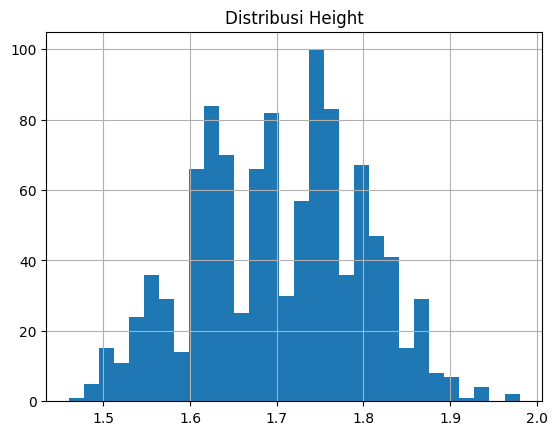

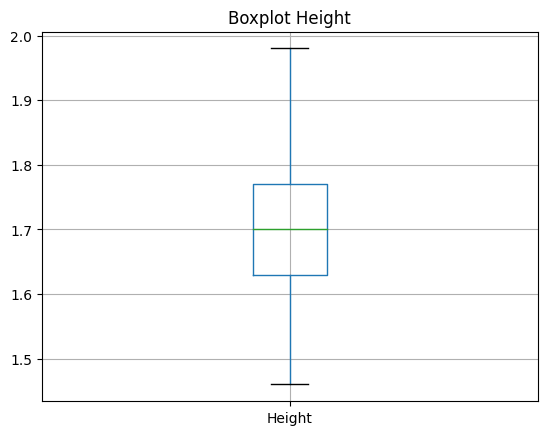

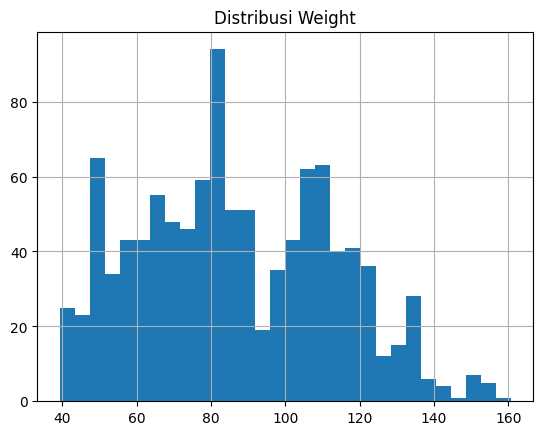

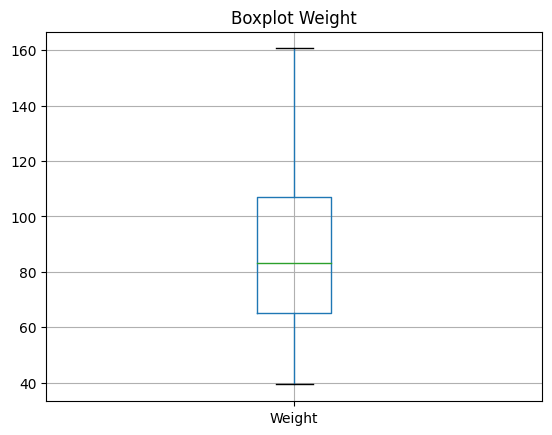

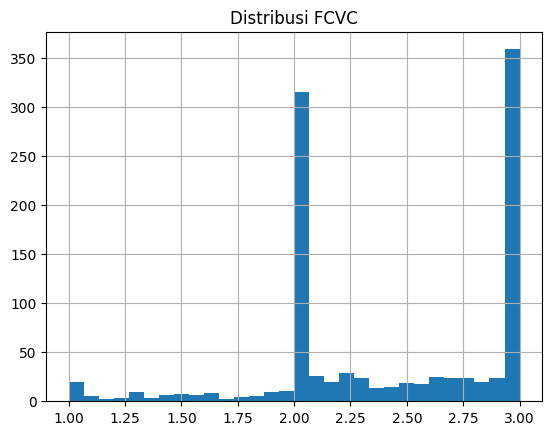

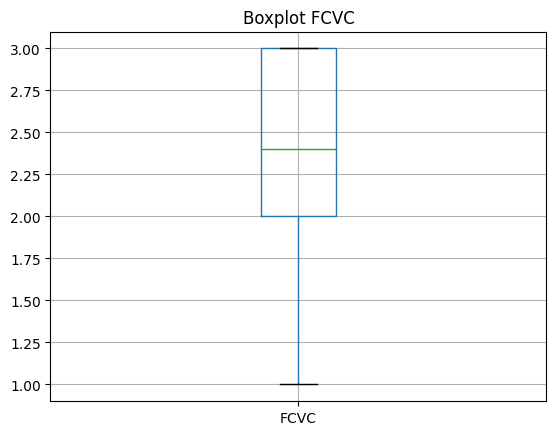

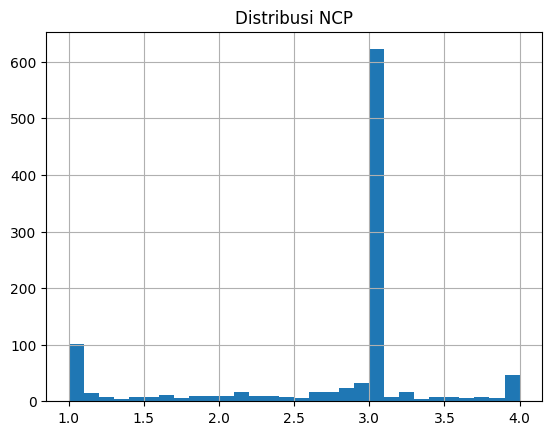

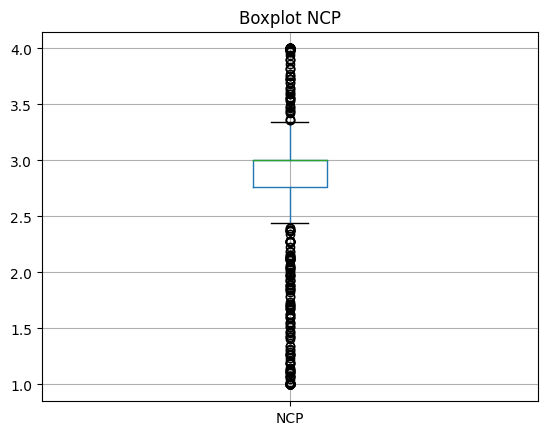

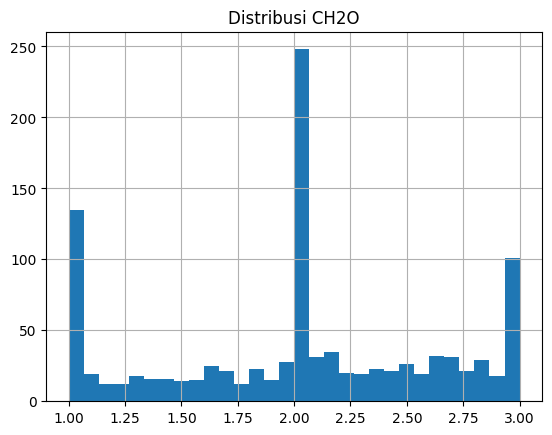

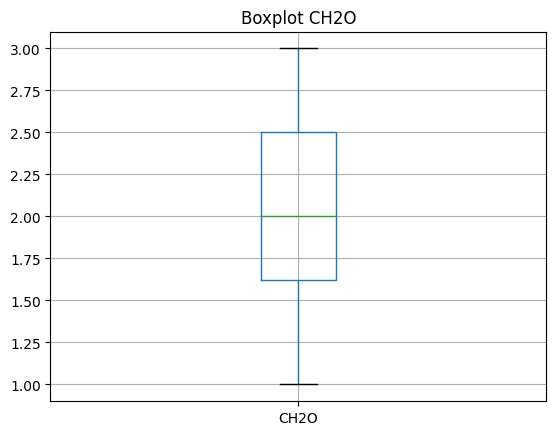

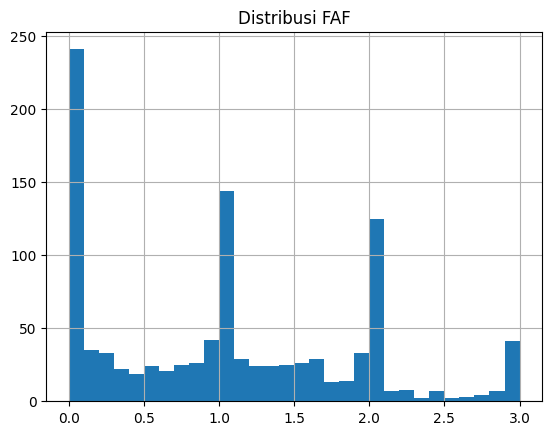

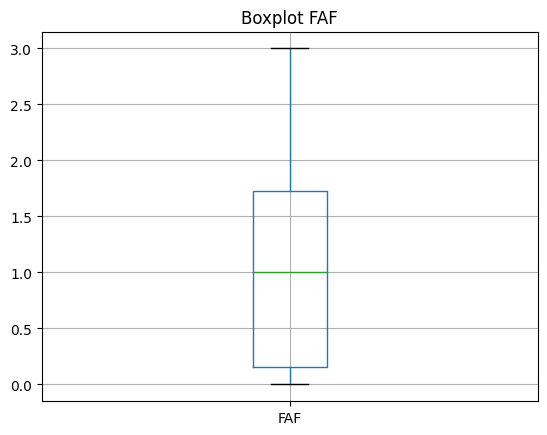

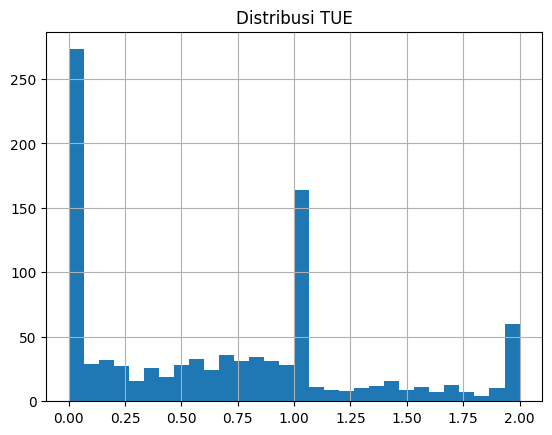

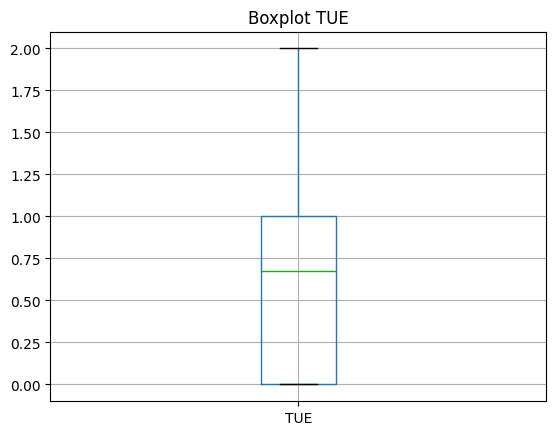

In [13]:
import matplotlib.pyplot as plt
for col in numeric:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f'Distribusi {col}')
    plt.show()
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Boxplot {col}')
    plt.show()

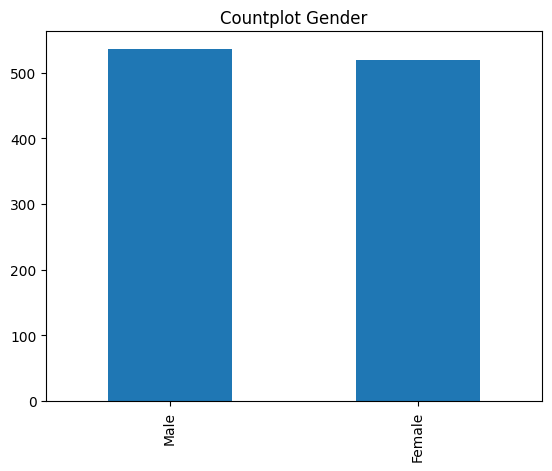

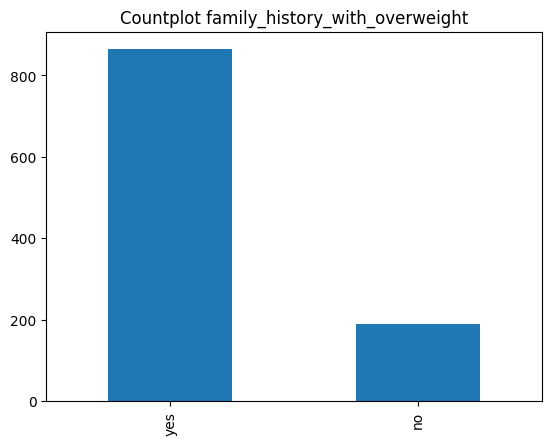

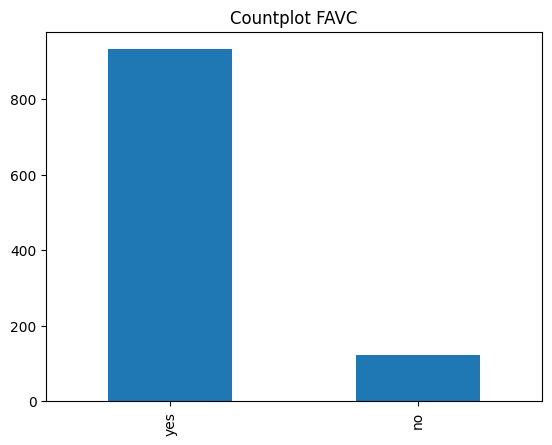

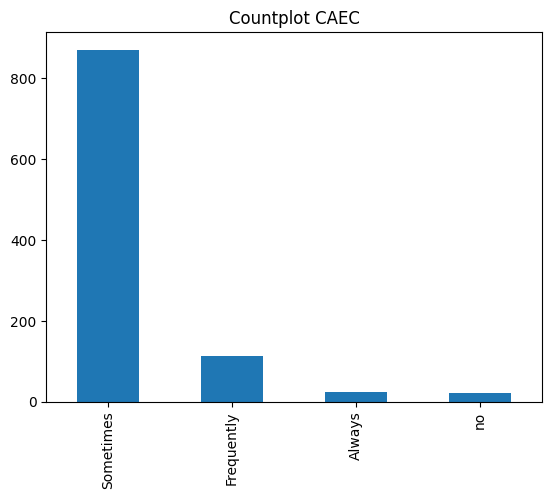

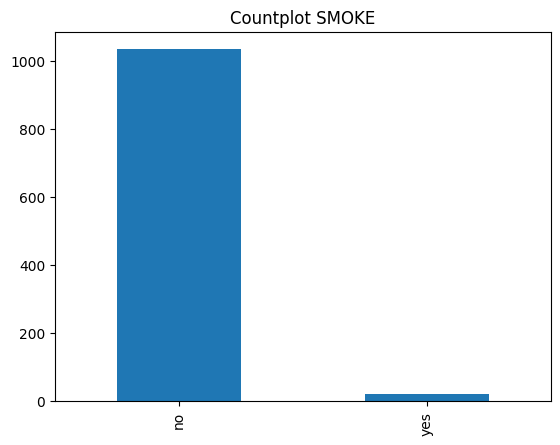

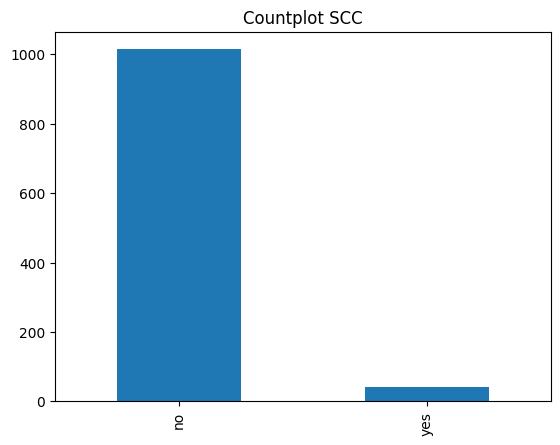

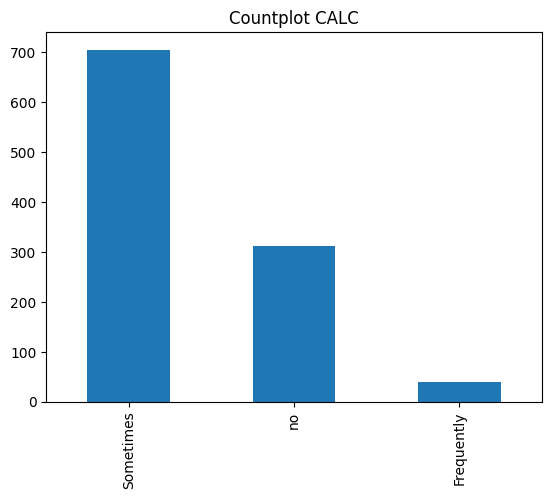

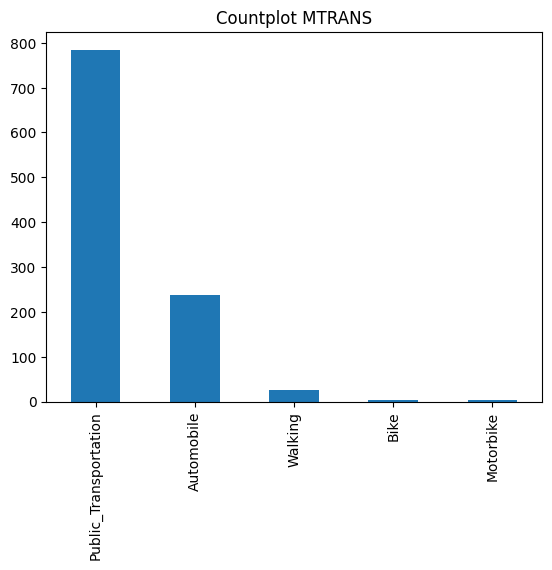

In [14]:
categorical = ['Gender','family_history_with_overweight','FAVC',
               'CAEC','SMOKE','SCC','CALC','MTRANS']
for col in categorical:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Countplot {col}')
    plt.show()

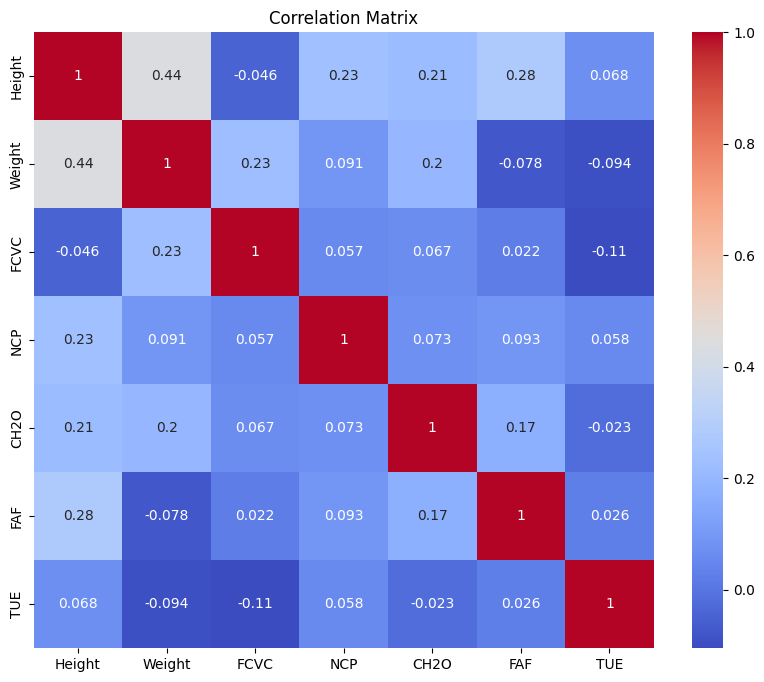

In [15]:
import seaborn as sns
corr = df.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Hasil EDA (Exploratory Data Analysis) yang Diperoleh:**

Kualitas Data Secara Umum:

- Dataset ini tergolong cukup bersih, namun masih terdapat beberapa data issues yang perlu ditangani.
- Teridentifikasi beberapa ketidakkonsistenan data dan nilai-nilai dirty yang memerlukan pembersihan lebih lanjut.

Temuan Utama:

1. Missing Values:
    - Masih ditemukan nilai NaN pada beberapa kolom yang membutuhkan penanganan khusus.
    - Masalah Tipe Data:
    Kolom Age seharusnya berisi nilai numerik, namun saat ini terdeteksi sebagai object karena terdapat:
        - Karakter non-numerik (seperti teks atau simbol). 
        - Format nilai yang tidak konsisten. 
        - Kemungkinan typo atau input error. 
  


**Hasil Analisis Eksplorasi Data (EDA) Berdasarkan Visualisasi:**

1. Distribusi Data dan Outlier
    - Teridentifikasi adanya outlier yang signifikan pada beberapa kolom numerik, yang dapat memengaruhi performa model statistika/machine learning jika tidak ditangani

2. Faktor Risiko Penyakit
    - Analisis menunjukkan korelasi kuat antara riwayat keluarga dan prevalensi penyakit:
        - Pasien dengan anggota keluarga pengidap memiliki risiko lebih tinggi
        - Pola hidup tidak sehat turut berkontribusi:
            • Asupan cairan yang kurang (minum air putih <8 gelas/hari)
            • Aktivitas fisik rendah (frekuensi olahraga <2x/minggu)
            • Kebiasaan lainnya yang teridentifikasi dalam data

3. Adanya kerolasi antara height dan weight yang cukup tinggi

# PREPROCESSING

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pickle

In [17]:
# Konversi kolom numerik yang terekam sebagai string
for col in ['Age']:
    df[col] = df[col].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)

Dikarenakan pada kolom age tertera bahwa valuenya berupa object, dimana pada kolom age seharusnya value dari kolom tersebut berupa interger. Maka perlu dirubah tipe kolom age ini.

In [18]:
# Kolom numeric
numeric = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Kolom categorical
categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()

Melakukan inisiasi ulang, sehingga kolom-kolom yang terlah di perbaharui agar saat digunakan sudah sesuai dengan tipenya

In [19]:
df.isna().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                               0
NCP                                0
CAEC                              26
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                               37
CALC                               0
MTRANS                             0
NObeyesdad                         0
dtype: int64

In [20]:
# Drop nan pada numerik
df.dropna(subset=['TUE'], inplace=True)

# Imputasi nilai NaN pada kategori dengan modus
df.dropna(subset=categorical, inplace=True)

Setelah mengetahui nilai nan yang ada pada tiap kolom, dan melihat bahwa nilai nan yang ada hanya berupa sedikit saja atau bisa dibilang <10% saja. Maka disini saya akan melakukan dropping pada kolom TUE dan melakukan imputasi pada katergorical dengan modus

In [21]:
Q1 = df[numeric].quantile(0.25)
Q3 = df[numeric].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

for col in numeric:
    df[col] = df[col].clip(lower=lower[col], upper=upper[col])

Karena model kali ini akan menggunakan standarscaler yang dimana jika adanya suatu outlier dapat mempengaruhi modelingnya, jadi perlu dilakukannya handling outliers

In [22]:
# Pipeline numerik: imputer + scaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Pipeline kategorikal: imputer + one-hot
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


Disini membuat pipeline yang terpisah dengan model, untuk mengetahui apakah yang akan kita predict sudah benar atau sesuai apa yang kita inginkan

# Modeling

In [23]:
len(df)

992

In [24]:
# Tentukan kolom target
y = df['NObeyesdad']

X = df.drop(columns='NObeyesdad',axis=1)

Disini saya menentukan Kolom target yang akan saya prediksi

In [25]:
# Split data menjadi 3 bagian, train (70%), validation & test masing-masing 15%
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)
print(f"Train: {X_train.shape[0]} sampel, Test: {X_test.shape[0]} sampel")

Train: 694 sampel, Test: 298 sampel


Pada tahap ini saya akan melakukan split dat menjadi train dan test

In [26]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
979,Female,26.0,1.56,102.00,yes,yes,3.00,3.00,Sometimes,yes,1.00,no,0.00,1.000,Sometimes,Public_Transportation
511,Female,26.0,1.63,105.04,yes,yes,3.00,3.00,Sometimes,no,2.35,no,0.01,0.504,Sometimes,Public_Transportation
1003,Female,21.0,1.73,132.12,yes,yes,3.00,3.00,Sometimes,no,1.67,no,1.68,0.780,Sometimes,Public_Transportation
759,Female,26.0,1.63,111.88,yes,yes,3.00,3.00,Sometimes,no,2.62,no,0.00,0.124,Sometimes,Public_Transportation
139,Female,17.0,1.71,45.25,no,yes,2.91,3.13,Sometimes,no,2.20,no,2.41,1.403,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,Male,18.0,1.68,79.75,yes,yes,2.41,2.52,Sometimes,no,1.99,no,0.01,0.965,Sometimes,Public_Transportation
99,Female,35.0,1.68,79.85,yes,yes,2.73,3.00,Sometimes,no,1.30,no,0.00,1.103,no,Automobile
136,Male,23.0,1.77,96.08,yes,yes,2.00,3.00,Sometimes,no,3.00,no,3.00,2.000,no,Public_Transportation
860,Female,17.0,1.60,65.00,yes,yes,3.00,2.45,Sometimes,no,2.00,yes,0.48,1.721,Sometimes,Public_Transportation


In [27]:
print(y_train)

979        Obesity_Type_III
511        Obesity_Type_III
1003       Obesity_Type_III
759        Obesity_Type_III
139     Insufficient_Weight
               ...         
19      Overweight_Level_II
99      Overweight_Level_II
136          Obesity_Type_I
860      Overweight_Level_I
320           Normal_Weight
Name: NObeyesdad, Length: 694, dtype: object


In [28]:
categorical.remove('NObeyesdad')

In [29]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

Setelah melakukan drop columns NObeyesdad (target kolom), kemudian saya melakukan encoding unutuk y train dan test

In [30]:
# Preprocessing dengan ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical)
])

In [31]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Age', 'Height', 'Weight', 'FCVC', 'NCP',
                                  'CH2O', 'FAF', 'TUE']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Gender', 'family_history_with_overweight',
                                  'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
                                  'MTRANS'])])

In [32]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,31.0,1.87,128.87,yes,yes,2.96,3.00000,Sometimes,yes,1.28,no,0.90,1.875,Sometimes,Automobile,Obesity_Type_II
1,Female,18.0,1.59,40.00,yes,yes,2.00,2.34375,Frequently,no,1.00,no,0.00,2.000,no,Public_Transportation,Insufficient_Weight
2,Female,35.0,1.59,77.00,yes,yes,2.00,3.00000,Sometimes,no,2.81,no,0.00,0.000,Sometimes,Automobile,Obesity_Type_I
3,Male,31.0,1.68,102.00,yes,yes,2.94,2.34375,Sometimes,no,1.25,no,1.18,0.778,no,Public_Transportation,Obesity_Type_II
4,Male,22.0,1.74,75.00,yes,yes,3.00,3.00000,Frequently,no,1.00,no,1.00,0.000,no,Automobile,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,Female,19.0,1.62,69.98,yes,yes,2.25,2.75000,Sometimes,no,2.33,no,0.82,0.024,no,Public_Transportation,Overweight_Level_I
1051,Male,27.0,1.78,113.15,yes,yes,2.22,3.00000,Sometimes,no,2.09,no,0.55,1.743,Sometimes,Automobile,Obesity_Type_II
1052,Male,23.0,1.72,70.00,no,no,2.00,3.00000,Sometimes,no,2.00,no,3.00,1.000,Frequently,Public_Transportation,Normal_Weight
1053,Male,21.0,1.86,89.56,yes,yes,2.00,3.00000,Sometimes,no,1.01,no,0.00,0.798,Sometimes,Public_Transportation,Overweight_Level_I


In [33]:
# Pipeline 1: Random Forest
pipeline_rf = Pipeline([
    ('preproc', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Pipeline 2: XGBoost
pipeline_xgb = Pipeline([
    ('preproc', preprocessor),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])


Membuat pipeline model yang akan digunakan sehingga dapat mengetahui yang mana model terbaik yang dapat digunakan

In [34]:
# Training kedua model pipeline
pipeline_rf.fit(X_train, y_train)
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree', call...
  

In [35]:
from sklearn.metrics import accuracy_score, classification_report

models = {
    'RandomForest': pipeline_rf,
    'XGBoost': pipeline_xgb
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


RandomForest Accuracy: 0.9430
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        39
           1       0.83      0.83      0.83        41
           2       0.98      0.98      0.98        48
           3       1.00      0.98      0.99        42
           4       1.00      1.00      1.00        45
           5       0.93      0.95      0.94        41
           6       0.95      0.93      0.94        42

    accuracy                           0.94       298
   macro avg       0.94      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298


XGBoost Accuracy: 0.9463
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        39
           1       0.85      0.85      0.85        41
           2       0.98      1.00      0.99        48
           3       1.00      0.98      0.99        42
           4       1.00      1.00      1.00        45
           5       0.

Setelah melakukan modeling untuk kedua tipe model, dapat ditemukan bahwa model xgboost memiliki accuraccy lebih tinggi ketimbang random fores dan hal yang lain juga lebih unggul. Sehingga hal ini membuktikan bahwa model xgboost yang akan dipilih

In [36]:
best_model = pipeline_xgb

import pickle
with open('obesity_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model XGBoost terbaik berhasil disimpan.")

Model XGBoost terbaik berhasil disimpan.


In [37]:
le.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)